
# Monte Carlo simulation of 2D Ising model

O Hamiltoniano do sistema é $$\mathcal{H} = -J\sum_{\langle ij\rangle} S_iS_j ,$$

onde $J$ é a intensidade da interação 

O parâmetro de ordem é a magnetização média: $$m=\frac{1}{N}\sum_i S_i.$$
No caso em que $m=0$, temos um estado desordenado e quando temos $m\neq 0$ temos uma preferência de algum valor de spin, ou seja, dizemos que o sistema está ordenado.

Os principais passos do algorítmo de metropolis são:
* 1 Preparar uma configuração inicial de N spins.
* 2 Flipar o spin de um sitio aleatório.
* 3 Calcular a mudança na energia $dE$.
* 4 Se $dE<0$, aceite a mudança. Caso contrário aceite a mudança com probabilidade $e^{\frac{-dE}{T}}$
* 5 Repita 2-4.


O passo 4 garante um estado final de equilibrio


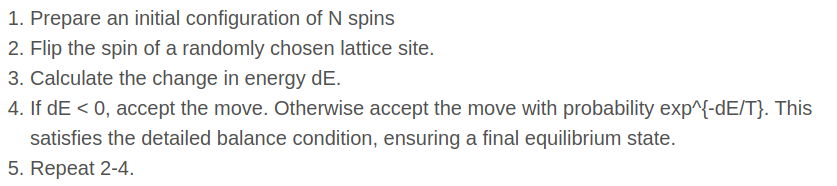

In [19]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
import random as rand
from PIL import Image

%matplotlib inline

In [20]:
class ising():
    #def __init__(self,T,steps,size):
    #    self.T= 2.2
    #    self.steps= 300
    #    self.size= 20
    def state_0(self,N):   
        state = 2*np.random.randint(2, size=(N,N))-1
        return state

    def show_state_0():
        config=state_0(4)
        self.plot_state(config)


    def Time_evolution_2(self,state,T,steps):
        beta=1/T
        Mag=[]
        Energy=[]
        E=0
        passos=[]
        A=np.shape(state)[0]
        B=np.shape(state)[1]
        for aux in range(steps):
            E=0
            for i in range(np.shape(state)[0]):
                for j in range(np.shape(state)[0]):
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rd.random() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
            for i in range(A):
                for j in range(B):
                    E+=energy(state,i,j)
            Energy.append(E)
            Mag.append(np.sum(config)/(A*B))
            passos.append(aux)

        return config,Energy,Mag,passos
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    

    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
    def plot_state(self,state):
        M,N = np.shape(state)[0],np.shape(state)[1]
        pixels=[]
        for i in range(0,N):
            for j in range(0,N):
                if state[i,j]==1:
                    pixels.append((40,250,60))#verde
                if state[i,j]==-1:
                    pixels.append((40,60,250))#azul
        im2 = Image.new("RGB", (N,N))
        im2.putdata(pixels)
        plt.imshow(im2)
        plt.show()

    def configPlot(self, f, config, i, N, n_):
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

In [21]:
I= ising()
I.show_state_0
#state=I.state_0
#I.plot_state(state)
#I.simulate()

<bound method ising.show_state_0 of <__main__.ising object at 0x7fa33680e370>>

In [2]:
def init_state(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def evolution(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def calcEnergy(config):
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.

def calcMag(config):
    mag = np.sum(config)
    return mag

In [3]:
nt      = 32         #  numero de temperaturas
N       = 10         #  tamanho do sitio 
eqSteps = 2**8       #  numero de passos para termalizar
mcSteps = 2**9       #  numero de passos para realizar as medidas


T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

In [5]:
for tt in range(nt):
    config = initialstate(N)         

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         #Termaliza
        mcmove(config, iT)           

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calcula a energia
        Mag = calcMag(config)        # calcula a magnetization

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

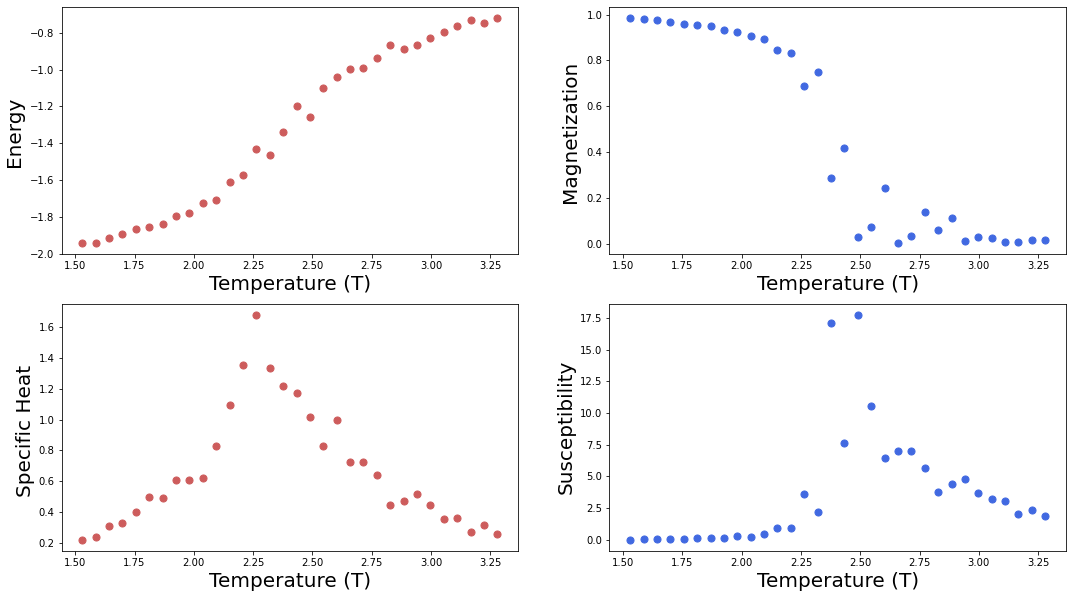

In [6]:
#  plot the calculated values   
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [8]:
%matplotlib inline
# Simulating the Ising model


class Ising():
    ''' Simulating the Ising model '''    
    
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    

    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

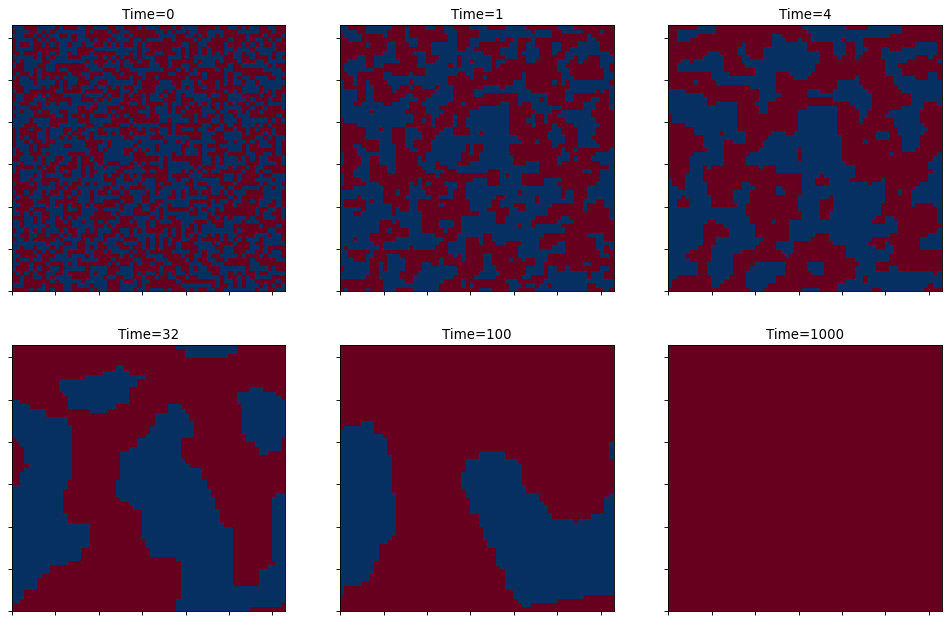

In [9]:
rm = Ising()
rm.simulate()

In [10]:
# This example uses the 5-point Laplacian discretization from 
# [here](https://github.com/ketch/finite-difference-course)
#
%matplotlib inline


a,b, k = 0, 1.0, 100.0
dh, dt = 1.0, 1e-3
Ng, Tf = 256, 10001




class TDGL():
    '''
    Class to solve a PDE 
    '''
    
    def mu(self, u):
        return a*u + b*u*u*u 

    
    
    def laplacian(self, Ng):
        '''Construct a sparse matrix that applies the 5-point Laplacian discretization'''
        e=np.ones(Ng**2)
        e2=([1]*(Ng-1)+[0])*Ng
        e3=([0]+[1]*(Ng-1))*Ng
        h=dh
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-Ng,Ng],Ng**2,Ng**2)
        A/=h**2
        return A

    
    
    def integrate(self, L, x, y, u):
        '''  simulates the equation and plots it at different instants '''
        
        f = plt.figure(figsize=(15, 15), dpi=80);    

        for i in range(Tf):          
            u = u - dt*(self.mu(u) - k*L.dot(u))
            
            if (i==0):      self.configPlot(x, y, u, f, 1, i);
            if (i==1):      self.configPlot(x, y, u, f, 2, i);
            if (i==10):     self.configPlot(x, y, u, f, 3, i);
            if (i==100):    self.configPlot(x, y, u, f, 4, i);
            if (i==1000):   self.configPlot(x, y, u, f, 5, i);
            if (i==10000):  self.configPlot(x, y, u, f, 6, i);

    def configPlot(self, x, y, u,f, n_, i):
        U= u.reshape((Ng, Ng))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(x,y,U, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)
    plt.show()

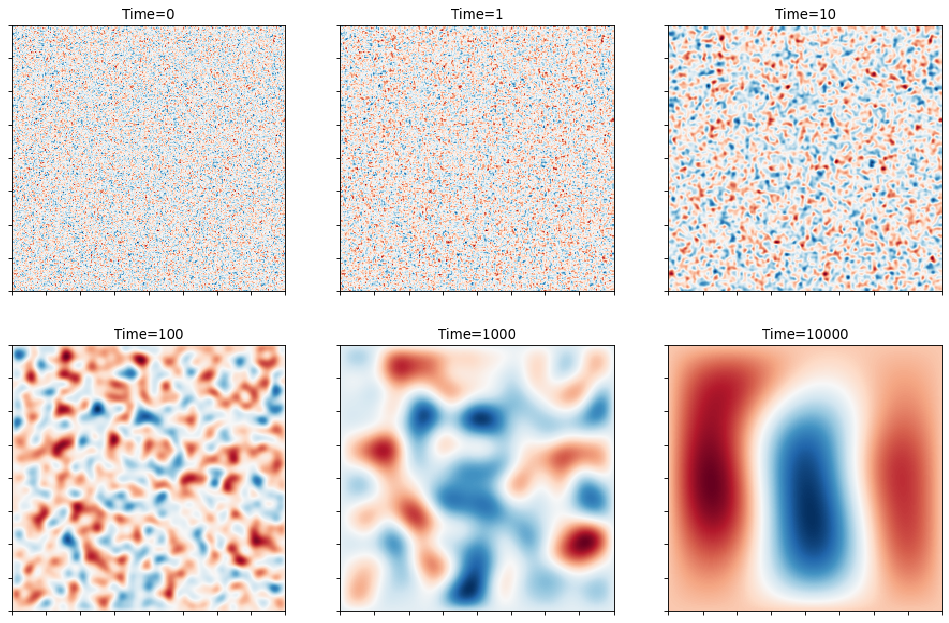

In [11]:
rm = TDGL()   # instantiate the class

# generate the grid and initialise the field
x = np.linspace(-1,1,Ng)
y = np.linspace(-1,1,Ng)
X, Y = np.meshgrid(x, y)

u=np.random.randn(Ng*Ng, 1);  # Initial data
L = rm.laplacian(Ng)         # construct the laplacian
rm.integrate(L, x, y, u)    # simulate

#simulation completed!!